In [916]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [917]:
df_validation = pd.read_csv(r'../../data/tidy/energy_validation_april2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [918]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [919]:
len(df_model['Vehicle'].unique())

178

In [920]:
len(df_validation['date'].unique())

30

In [921]:
len(df_model['Date'].unique())

30

In [922]:
validation_vehicles=df_validation['equipment_id'].unique()

In [923]:
len(validation_vehicles)

174

In [924]:
df_model_filtered=df_model.loc[df_model.Vehicle.isin(validation_vehicles)]

In [925]:
df_model['Date']=pd.to_datetime(df_model['Date'])

In [926]:
df_model_filtered

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,ServiceDateTime,Unnamed: 0,DateKey,CalendarDate,Year,...,acc,Powertrain,VehicleModel,Vehicle_mass,elevation,grade,Power(KW),FuelRate(L/s),Energy,FuelRate/Energy
2391,2391,2391,2391,2391,2391,2022-04-29 14:01:44,1273034,8788,2022-04-29 00:00:00.000,2022,...,0.000000,electric,New Flyer 35 electric,26900.0,64.0,0.000000,0.000000,0.000000,0.000000,NaN
2392,2392,2392,2392,2392,2392,2022-04-29 14:28:20,1273037,8788,2022-04-29 00:00:00.000,2022,...,0.005579,electric,New Flyer 35 electric,26900.0,134.0,0.004924,29.393513,0.000000,13.031124,NaN
2393,2393,2393,2393,2393,2393,2022-04-29 14:28:20,1273500,8788,2022-04-29 00:00:00.000,2022,...,0.000000,electric,New Flyer 35 electric,26900.0,134.0,0.000000,0.000000,0.000000,0.000000,NaN
2394,2394,2394,2394,2394,2394,2022-04-29 14:30:55,1273501,8788,2022-04-29 00:00:00.000,2022,...,0.035274,electric,New Flyer 35 electric,26900.0,135.0,0.001180,17.157445,0.000000,0.738723,NaN
2395,2395,2395,2395,2395,2395,2022-04-29 14:31:09,1273502,8788,2022-04-29 00:00:00.000,2022,...,0.678410,electric,New Flyer 35 electric,26900.0,129.0,-0.028638,243.343760,0.000000,0.946337,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361544,1361544,1361544,1361544,1361544,1361544,2022-04-30 23:54:20,1325566,8789,2022-04-30 00:00:00.000,2022,...,0.003673,conventional,0,26900.0,53.0,-0.051392,-17.216605,0.001660,0.061394,NaN
1361545,1361545,1361545,1361545,1361545,1361545,2022-04-30 23:55:24,1325567,8789,2022-04-30 00:00:00.000,2022,...,0.015960,conventional,0,26900.0,54.0,0.003961,6.338875,0.002274,0.038447,NaN
1361546,1361546,1361546,1361546,1361546,1361546,2022-04-30 23:56:47,1325568,8789,2022-04-30 00:00:00.000,2022,...,-0.013643,conventional,0,26900.0,54.0,0.000000,1.641251,0.001819,0.039882,NaN
1361547,1361547,1361547,1361547,1361547,1361547,2022-04-30 23:57:32,1325569,8789,2022-04-30 00:00:00.000,2022,...,0.057755,conventional,0,26900.0,53.0,-0.004106,6.706874,0.002310,0.027457,NaN


In [927]:
df_model_filtered = df_model_filtered.groupby(['Vehicle', 'Date']).agg({'Energy': ['sum'] ,'Powertrain': ['max'], 'dist': ['sum']}).reset_index()

In [928]:
df_model_filtered

,Vehicle,Date,Energy,Powertrain,dist
,,,sum,max,sum
0,1320,2022-04-29,56.277482,electric,38.462541
1,1321,2022-04-01,13.658196,electric,9.615819
2,1321,2022-04-04,23.888800,electric,11.612397
3,1321,2022-04-05,43.716905,electric,25.229515
4,1321,2022-04-06,9.411374,electric,7.551147
...,...,...,...,...,...
3005,7902,2022-04-26,12.751945,conventional,52.211481
3006,7902,2022-04-27,20.642130,conventional,86.274257
3007,7902,2022-04-28,43.865527,conventional,70.515202


In [929]:
df_model_filtered['Energy']

,sum
0,56.277482
1,13.658196
2,23.888800
3,43.716905
4,9.411374
...,...
3005,12.751945
3006,20.642130
3007,43.865527
3008,45.541657


In [930]:
model_vehicles=df_model['Vehicle'].unique()

In [931]:
df_validation_filtered=df_validation.loc[df_validation.equipment_id.isin(model_vehicles)]

In [932]:
len(df_validation_filtered.equipment_id.unique())

171

In [933]:
df_validation_filtered

,Unnamed: 0,timestamp,equipment_id,gallons,date,Powertrain
0,58949,2022-04-01 18:59:00,3212,10.1,2022-04-01,conventional
1,59065,2022-04-07 01:01:00,3212,29.3,2022-04-07,conventional
2,59092,2022-04-08 05:33:00,3212,52.0,2022-04-08,conventional
3,59100,2022-04-08 23:20:00,3212,25.1,2022-04-08,conventional
4,59125,2022-04-10 05:38:00,3212,54.1,2022-04-10,conventional
...,...,...,...,...,...,...
2948,4682,2022-04-26 19:12:00,7816,51.6,2022-04-26,conventional
2949,4683,2022-04-27 20:39:00,7816,19.3,2022-04-27,conventional
2950,4684,2022-04-28 14:02:00,7816,14.0,2022-04-28,conventional
2951,4685,2022-04-29 19:10:00,7816,18.4,2022-04-29,conventional


In [934]:
#df_validation_filtered=df_validation_filtered[df_validation_filtered['gallons']<70]

In [935]:
df_validation_filtered['gallons'].mean()

29.053083730428856

In [936]:
df_validation_filtered['gallons'].median()

30.0

In [937]:
df_validation_filtered['gallons'].max()

84.79

In [938]:
df_validation_filtered = df_validation_filtered.groupby(['equipment_id', 'date']).agg({'gallons': ['sum']}).reset_index()

In [939]:
df_validation_filtered

,equipment_id,date,gallons
,,,sum
0,1320,2022-04-27,0.68
1,1320,2022-04-29,0.69
2,1321,2022-04-18,1.83
3,1321,2022-04-19,0.58
4,1321,2022-04-29,0.66
...,...,...,...
2719,7902,2022-04-25,59.70
2720,7902,2022-04-26,12.20
2721,7902,2022-04-27,23.80


In [940]:
df_validation_filtered.rename(
    columns={"equipment_id":"Vehicle",
                "date":"Date",
                "gallons":"Real_Energy"}
          ,inplace=True)

In [941]:
cols = ['Vehicle', 'Date']
df_integrated=df_model_filtered.join(df_validation_filtered.set_index(cols), on=cols)

In [942]:
df_integrated

,Vehicle,Date,Energy,Powertrain,dist,Real_Energy
,,,sum,max,sum,sum
0,1320,2022-04-29,56.277482,electric,38.462541,0.69
1,1321,2022-04-01,13.658196,electric,9.615819,NaN
2,1321,2022-04-04,23.888800,electric,11.612397,NaN
3,1321,2022-04-05,43.716905,electric,25.229515,NaN
4,1321,2022-04-06,9.411374,electric,7.551147,NaN
...,...,...,...,...,...,...
3005,7902,2022-04-26,12.751945,conventional,52.211481,12.20
3006,7902,2022-04-27,20.642130,conventional,86.274257,23.80
3007,7902,2022-04-28,43.865527,conventional,70.515202,NaN


In [943]:
df_integrated.columns

MultiIndex([(    'Vehicle',    ''),
            (       'Date',    ''),
            (     'Energy', 'sum'),
            ( 'Powertrain', 'max'),
            (       'dist', 'sum'),
            ('Real_Energy', 'sum')],
           )

In [944]:
df_integrated.columns = df_integrated.columns.droplevel()

In [945]:
df_integrated.columns =['Vehicle', 'Date', 'Energy', 'Powertrain', 'Distance', 'Real_Energy']

In [946]:
df_integrated

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy
0,1320,2022-04-29,56.277482,electric,38.462541,0.69
1,1321,2022-04-01,13.658196,electric,9.615819,NaN
2,1321,2022-04-04,23.888800,electric,11.612397,NaN
3,1321,2022-04-05,43.716905,electric,25.229515,NaN
4,1321,2022-04-06,9.411374,electric,7.551147,NaN
...,...,...,...,...,...,...
3005,7902,2022-04-26,12.751945,conventional,52.211481,12.20
3006,7902,2022-04-27,20.642130,conventional,86.274257,23.80
3007,7902,2022-04-28,43.865527,conventional,70.515202,NaN
3008,7902,2022-04-29,45.541657,conventional,87.448258,19.00


In [947]:
df_integrated.columns.nlevels 

1

In [948]:
df_integrated['Real_Energy'].isna().sum()

482

In [949]:
df_integrated['Fuel/energy_economy']=df_integrated['Distance']/df_integrated['Energy']

In [950]:
df_integrated['Real_Fuel/energy_economy']=df_integrated['Distance']/df_integrated['Real_Energy']

In [951]:
#df_integrated=df_integrated.dropna()

In [952]:
df_integrated

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
0,1320,2022-04-29,56.277482,electric,38.462541,0.69,0.683445,55.742813
1,1321,2022-04-01,13.658196,electric,9.615819,NaN,0.704033,NaN
2,1321,2022-04-04,23.888800,electric,11.612397,NaN,0.486102,NaN
3,1321,2022-04-05,43.716905,electric,25.229515,NaN,0.577111,NaN
4,1321,2022-04-06,9.411374,electric,7.551147,NaN,0.802343,NaN
...,...,...,...,...,...,...,...,...
3005,7902,2022-04-26,12.751945,conventional,52.211481,12.20,4.094394,4.279630
3006,7902,2022-04-27,20.642130,conventional,86.274257,23.80,4.179523,3.624969
3007,7902,2022-04-28,43.865527,conventional,70.515202,NaN,1.607531,NaN
3008,7902,2022-04-29,45.541657,conventional,87.448258,19.00,1.920182,4.602540


<AxesSubplot:>

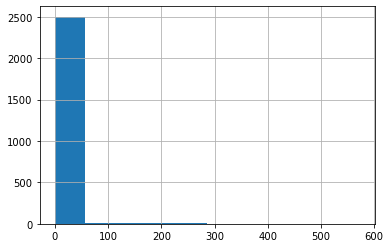

In [953]:
df_integrated['Real_Fuel/energy_economy'].hist()

In [954]:
df_hybrid=df_integrated.loc[df_integrated['Powertrain'] == 'hybrid'].copy()
df_conventional=df_integrated.loc[df_integrated['Powertrain'] == 'conventional'].copy()
df_hybrid=df_hybrid.dropna()
df_conventional=df_conventional.dropna()


In [955]:
df_hybrid

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
1197,1801,2022-04-01,24.677914,hybrid,152.778852,50.91,6.190914,3.000960
1198,1801,2022-04-02,28.274659,hybrid,168.948906,60.73,5.975277,2.781968
1200,1801,2022-04-07,1.813880,hybrid,10.000853,5.89,5.513515,1.697938
1201,1801,2022-04-08,37.631591,hybrid,156.441346,33.53,4.157181,4.665713
1202,1801,2022-04-09,25.616082,hybrid,138.727266,23.54,5.415632,5.893257
...,...,...,...,...,...,...,...,...
2985,7901,2022-04-26,33.919634,hybrid,141.151438,20.00,4.161349,7.057572
2986,7901,2022-04-27,15.944028,hybrid,70.485221,40.10,4.420791,1.757736
2987,7901,2022-04-28,44.577972,hybrid,70.956078,23.00,1.591730,3.085047
2988,7901,2022-04-29,45.161777,hybrid,88.344636,20.00,1.956182,4.417232


In [956]:
#df_conventional=df_conventional[(df_conventional['Real_Fuel/energy_economy'] < 20)]

In [957]:
#df_conventional=df_conventional[(df_conventional['Real_Fuel/energy_economy'] > 1)]

In [958]:
train_conventional, test_conventional = train_test_split(df_conventional, test_size=0.2, random_state=(42))    
train_hybrid, test_hybrid = train_test_split(df_hybrid, test_size=0.2, random_state=(42))  

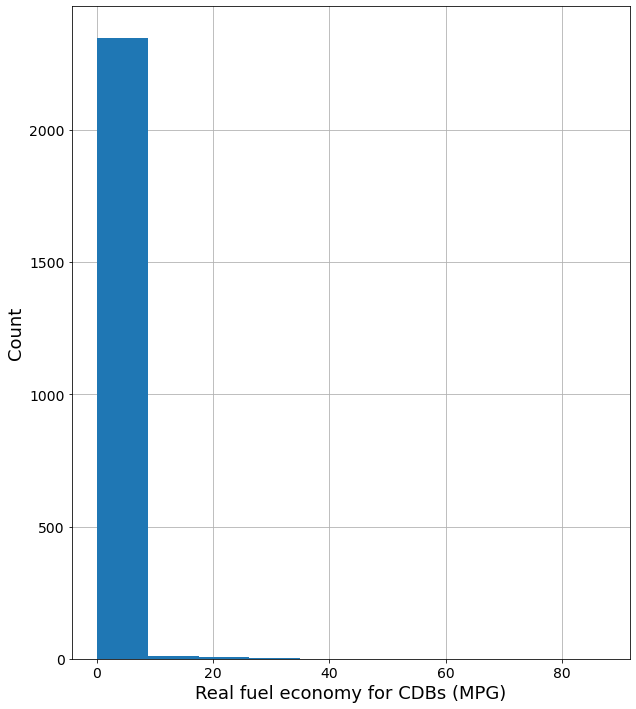

In [981]:
fig, ax = plt.subplots()
#df_conventional['Real_Fuel/energy_economy'][df_conventional['Real_Fuel/energy_economy']<20].hist(figsize = (10,12), zorder=3)
df_conventional['Real_Fuel/energy_economy'].hist(figsize = (10,12), zorder=3)
plt.xlabel("Real fuel economy for CDBs (MPG)", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig(r'../../figures/hist-economy-CDB.png', dpi=400, bbox_inches='tight')

<AxesSubplot:>

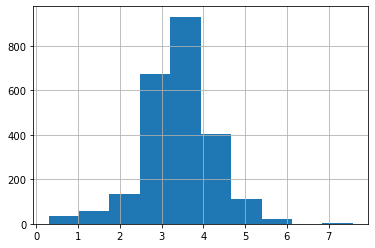

In [960]:
df_conventional['Fuel/energy_economy'].hist()

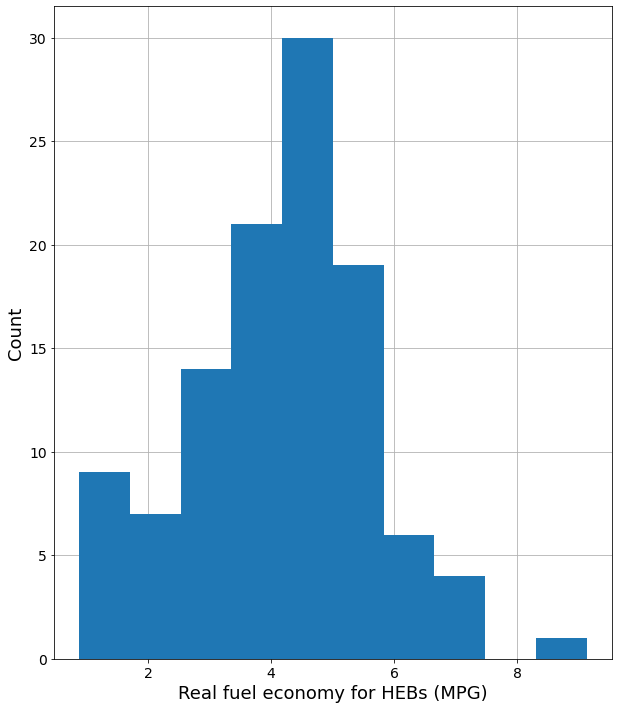

In [961]:
fig, ax = plt.subplots()
df_hybrid['Real_Fuel/energy_economy'].hist(figsize = (10,12), zorder=3)
plt.xlabel("Real fuel economy for HEBs (MPG)", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig(r'../../figures/hist-economy-HEB.png', dpi=400, bbox_inches='tight')

<AxesSubplot:>

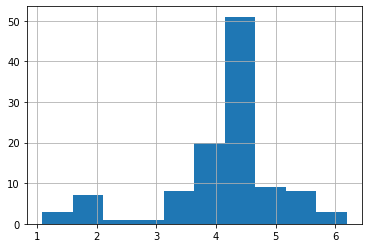

In [962]:
df_hybrid['Fuel/energy_economy'].hist()

In [963]:
df_conventional['Fuel/energy_economy'].mean()

3.3906941688031997

In [964]:
df_conventional['Real_Fuel/energy_economy'].mean()

3.253903059579212

In [965]:
df_hybrid['Fuel/energy_economy'].mean()

4.131422722568298

In [966]:
df_hybrid['Real_Fuel/energy_economy'].mean()

4.166555283149985

In [967]:
#df_conventional=df_conventional[(df_conventional['Real_Fuel/energy_economy'] < 20)]

In [968]:
#df_conventional['Real_Fuel/energy_economy'].hist()

In [969]:
#df_integrated.to_csv(r'../../results/model_plus_validation_results.csv')

In [970]:
from sklearn.metrics import mean_squared_error

rmse_conventional = mean_squared_error(df_conventional['Real_Fuel/energy_economy'], df_conventional['Fuel/energy_economy'], squared=False)
rmse_hybrid = mean_squared_error(df_hybrid['Real_Fuel/energy_economy'], df_hybrid['Fuel/energy_economy'], squared=False)
rmse_conventional_test = mean_squared_error(test_conventional['Real_Fuel/energy_economy'], test_conventional['Fuel/energy_economy'], squared=False)
rmse_hybrid_test = mean_squared_error(test_hybrid['Real_Fuel/energy_economy'], test_hybrid['Fuel/energy_economy'], squared=False)
rmse_conventional_train = mean_squared_error(train_conventional['Real_Fuel/energy_economy'], train_conventional['Fuel/energy_economy'], squared=False)
rmse_hybrid_train = mean_squared_error(train_hybrid['Real_Fuel/energy_economy'], train_hybrid['Fuel/energy_economy'], squared=False)

In [971]:
#print("For conventional RMSE total:", rmse_conventional, "test:", rmse_conventional_test, "train": rmse_conventional_train)

In [972]:
rmse_conventional

3.1035959232114934

In [973]:
rmse_conventional_test

1.702135144351886

In [974]:
rmse_conventional_train

3.364464414137495

In [975]:
rmse_hybrid

1.6296445216143305

In [976]:
rmse_hybrid_test

1.5639426526653695

In [977]:
rmse_hybrid_train

1.6463844627866522

In [383]:
#mse_hybrid = np.square(np.subtract(df_hybrid['Real_Fuel/energy_economy'],df_hybrid['Fuel/energy_economy'])).mean() 
#rmse_hybrid = math.sqrt(mse_hybrid)

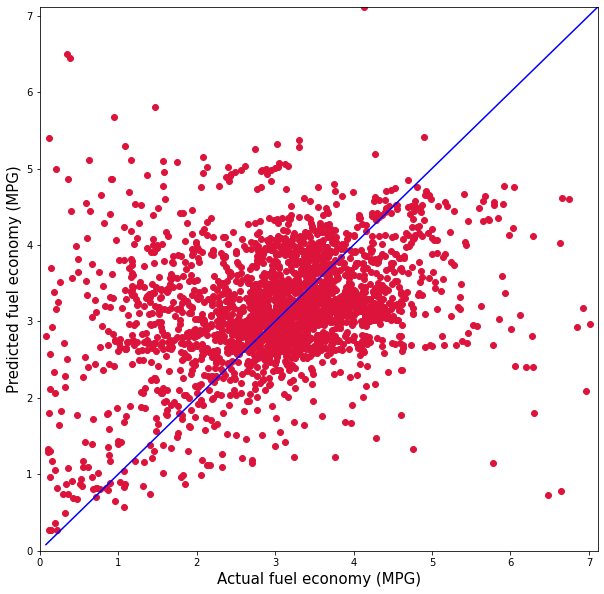

In [384]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df_conventional['Real_Fuel/energy_economy'], df_conventional['Fuel/energy_economy'], c='crimson')

p1 = max(max(df_conventional['Fuel/energy_economy']), max(df_conventional['Real_Fuel/energy_economy']))
p2 = min(min(df_conventional['Fuel/energy_economy']), min(df_conventional['Real_Fuel/energy_economy']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual fuel economy (MPG)', fontsize=15)
plt.ylabel('Predicted fuel economy (MPG)', fontsize=15)
plt.xlim([0, max(max(df_conventional['Fuel/energy_economy']), max(df_conventional['Fuel/energy_economy']))])
plt.ylim([0, max(max(df_conventional['Fuel/energy_economy']), max(df_conventional['Fuel/energy_economy']))])
fig.savefig(r'../../figures/actual-predicted-CDB.png', dpi=400, bbox_inches='tight')
plt.show()

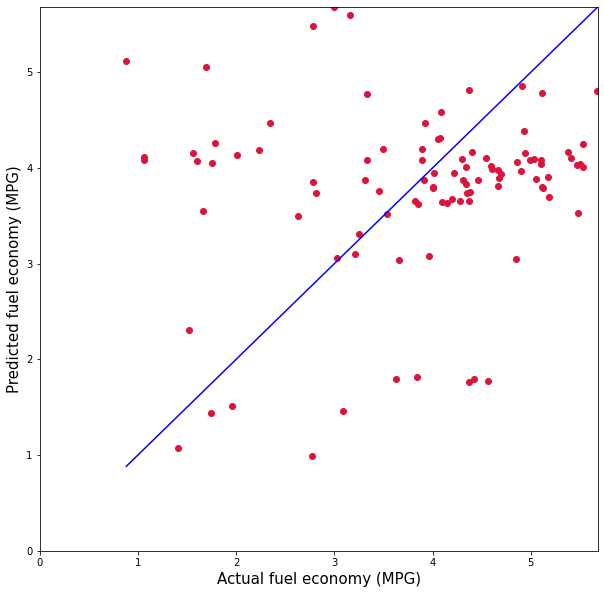

In [385]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df_hybrid['Real_Fuel/energy_economy'], df_hybrid['Fuel/energy_economy'], c='crimson')

p1 = max(max(df_hybrid['Fuel/energy_economy']), max(df_hybrid['Real_Fuel/energy_economy']))
p2 = min(min(df_hybrid['Fuel/energy_economy']), min(df_hybrid['Real_Fuel/energy_economy']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual fuel economy (MPG)', fontsize=15)
plt.ylabel('Predicted fuel economy (MPG)', fontsize=15)
plt.xlim([0, max(max(df_hybrid['Fuel/energy_economy']), max(df_hybrid['Fuel/energy_economy']))])
plt.ylim([0, max(max(df_hybrid['Fuel/energy_economy']), max(df_hybrid['Fuel/energy_economy']))])
fig.savefig(r'../../figures/actual-predicted-HEB.png', dpi=400, bbox_inches='tight')
plt.show()

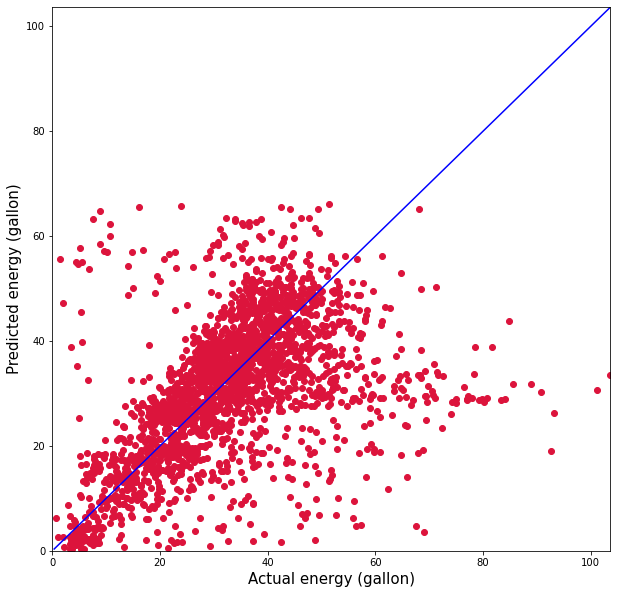

In [386]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df_conventional['Real_Energy'], df_conventional['Energy'], c='crimson')

p1 = max(max(df_conventional['Real_Energy']), max(df_conventional['Energy']))
p2 = min(min(df_conventional['Real_Energy']), min(df_conventional['Energy']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual energy (gallon)', fontsize=15)
plt.ylabel('Predicted energy (gallon)', fontsize=15)
plt.xlim([0, max(max(df_conventional['Real_Energy']), max(df_conventional['Energy']))])
plt.ylim([0, max(max(df_conventional['Real_Energy']), max(df_conventional['Energy']))])
fig.savefig(r'../../figures/actual-predicted-CDB-energy.png', dpi=400, bbox_inches='tight')
plt.show()

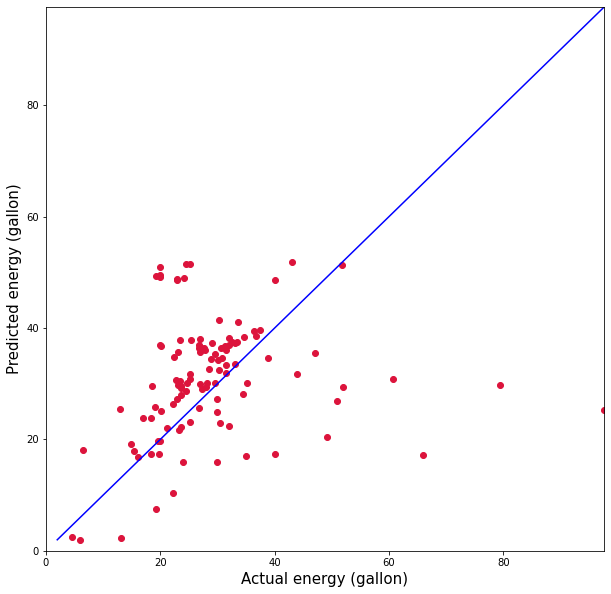

In [387]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df_hybrid['Real_Energy'], df_hybrid['Energy'], c='crimson')

p1 = max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))
p2 = min(min(df_hybrid['Real_Energy']), min(df_hybrid['Energy']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual energy (gallon)', fontsize=15)
plt.ylabel('Predicted energy (gallon)', fontsize=15)
plt.xlim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
plt.ylim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
fig.savefig(r'../../figures/actual-predicted-HEB-energy.png', dpi=400, bbox_inches='tight')
plt.show()

In [366]:
df_conventional['Real_Fuel/energy_economy'].mean()

3.253903059579212

In [367]:
df_conventional['Fuel/energy_economy'].mean()

3.4768101787935617

In [368]:
df1_vehicles=[3212]

In [370]:
df_integrated.loc[df_integrated['Vehicle'].isin(df1_vehicles)]

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
2083,3212,2022-04-07,54.448165,conventional,135.018871,29.3,2.479769,4.608153
2084,3212,2022-04-08,29.268055,conventional,76.937812,77.1,2.628730,0.997896
2086,3212,2022-04-11,30.128772,conventional,91.369757,29.5,3.032641,3.097280
2087,3212,2022-04-12,14.322785,conventional,16.616347,10.6,1.160134,1.567580
2089,3212,2022-04-14,36.638109,conventional,154.372203,42.6,4.213433,3.623761
2090,3212,2022-04-15,5.323859,conventional,17.189445,55.9,3.228756,0.307503
2091,3212,2022-04-23,21.680445,conventional,63.446732,33.1,2.926450,1.916820
2092,3212,2022-04-24,22.640343,conventional,63.427457,21.3,2.801524,2.977815
2094,3212,2022-04-26,18.438642,conventional,19.213700,46.2,1.042034,0.415881
2096,3212,2022-04-28,28.856438,conventional,100.280686,60.2,3.475158,1.665792


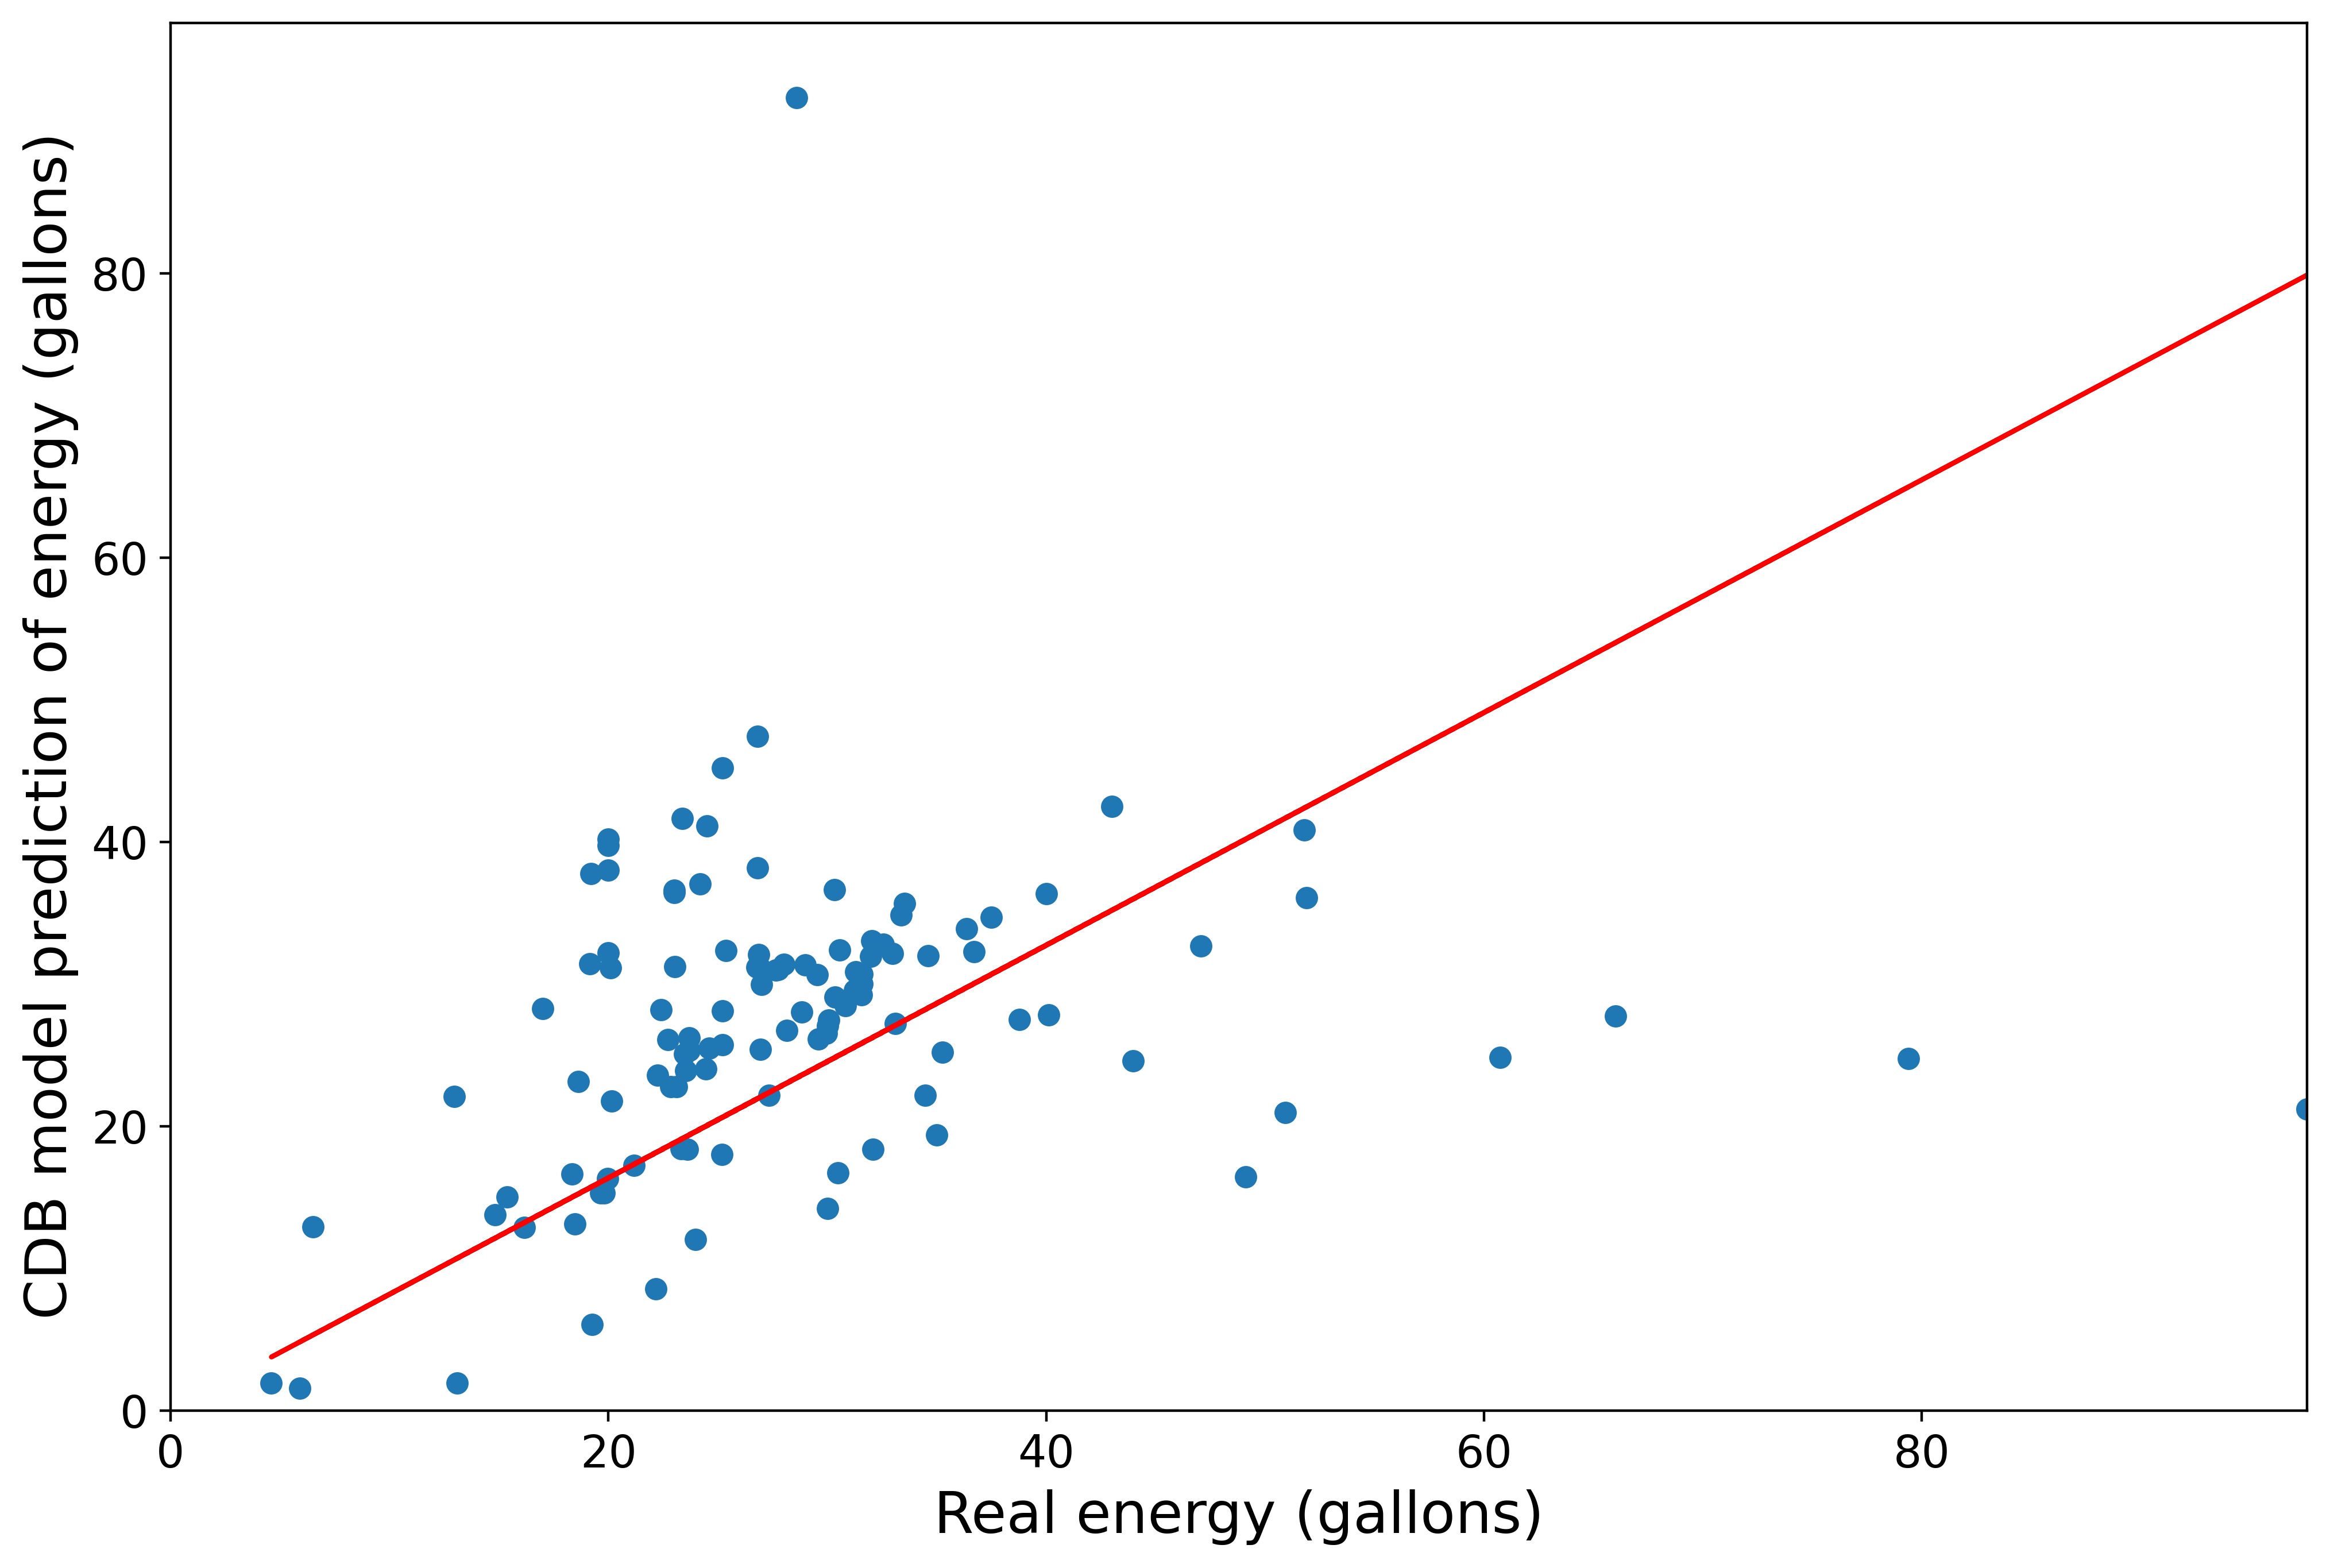

In [391]:
figure(figsize=(12, 8), dpi=400)
plt.plot(df_hybrid['Real_Energy'], 0.8183*df_hybrid['Real_Energy'], color='red')
plt.scatter(x=df_hybrid['Real_Energy'], y=df_hybrid['Energy'])
plt.xlabel("Real energy (gallons)", fontsize=18)
plt.ylabel("CDB model prediction of energy (gallons) ", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
plt.ylim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
plt.savefig(r'../../figures/beta-estimation.png', dpi=400, bbox_inches='tight')
plt.show()

In [376]:
X= df_hybrid['Real_Energy']
y= df_hybrid['Energy']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Energy   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                              372.9
Date:                Thu, 28 Jul 2022   Prob (F-statistic):                    3.96e-37
Time:                        08:22:53   Log-Likelihood:                         -450.90
No. Observations:                 111   AIC:                                      903.8
Df Residuals:                     110   BIC:                                      906.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [381]:
df_hybrid_filtered=df_hybrid[df_hybrid['Real_Energy']<=40]
df_hybrid_filtered=df_hybrid_filtered[df_hybrid['Energy']<=40]

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_39472\108788406.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hybrid_filtered=df_hybrid_filtered[df_hybrid['Energy']<=40]


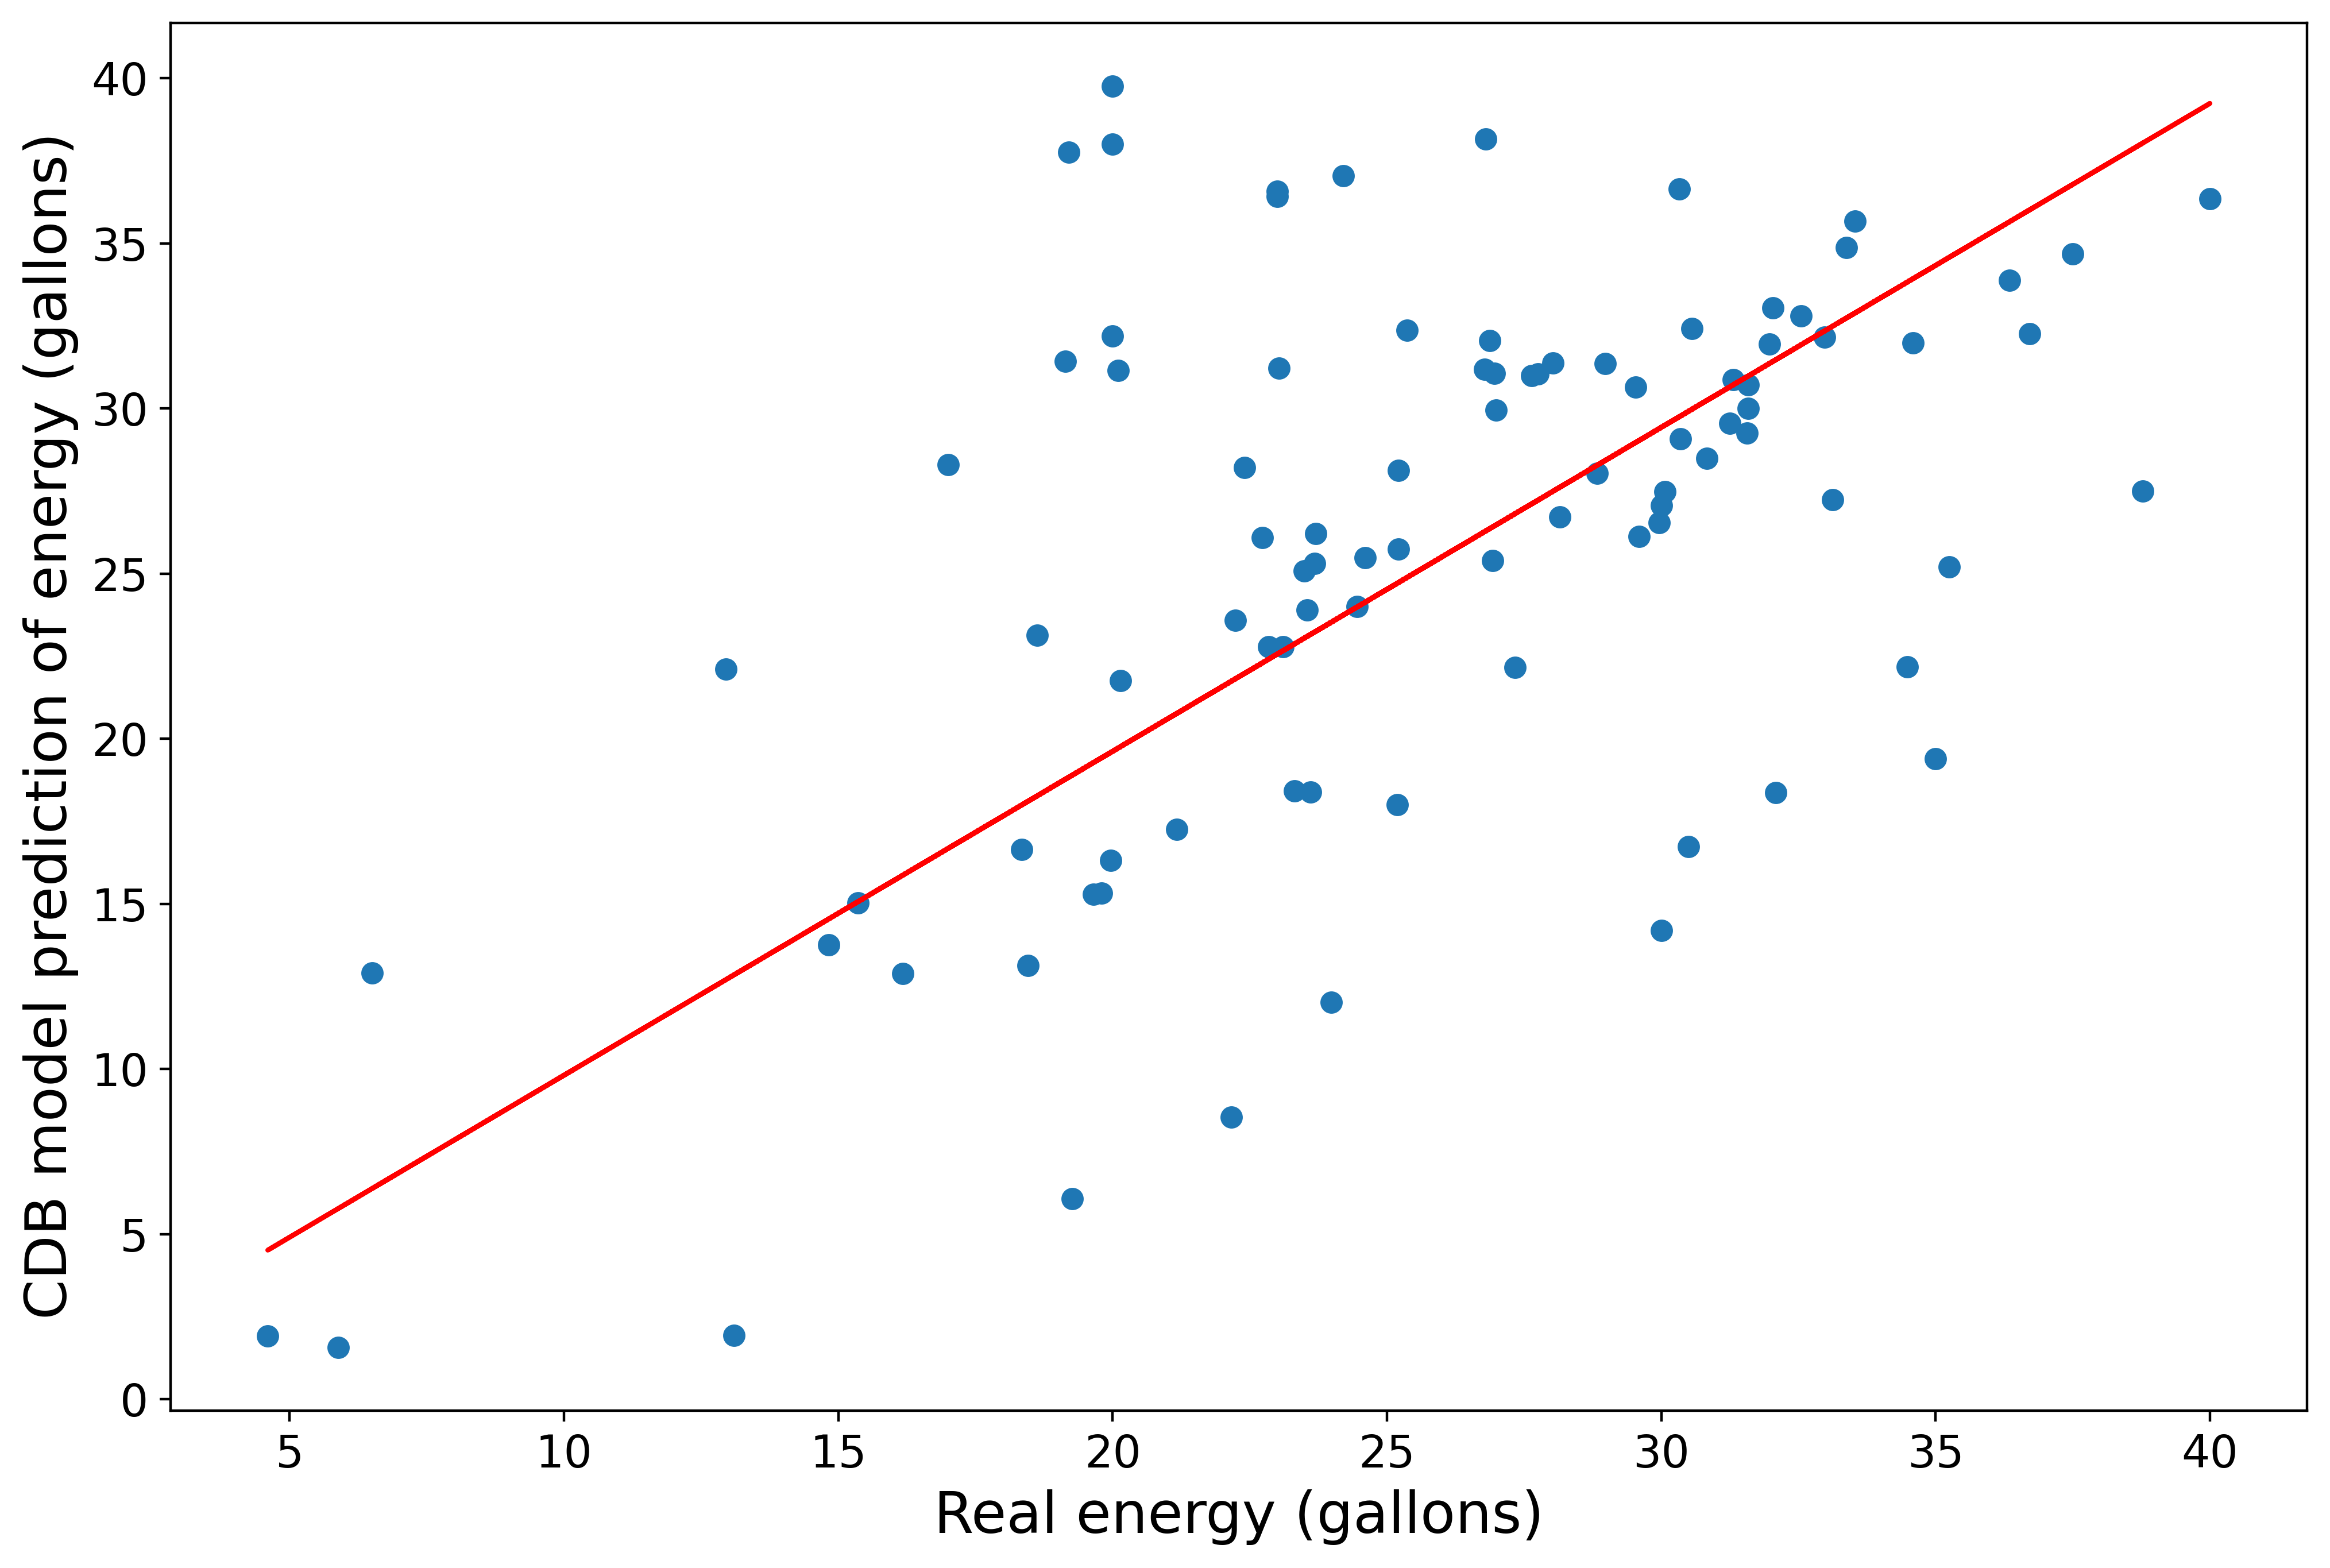

In [388]:
figure(figsize=(12, 8), dpi=400)
plt.plot(df_hybrid_filtered['Real_Energy'], 0.9810*df_hybrid_filtered['Real_Energy'], color='red')
plt.scatter(x=df_hybrid_filtered['Real_Energy'], y=df_hybrid_filtered['Energy'])
plt.xlabel("Real energy (gallons)", fontsize=18)
plt.ylabel("CDB model prediction of energy (gallons) ", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(r'../../figures/beta-estimation-without outliers.png', dpi=400, bbox_inches='tight')
plt.show()



In [383]:
X= df_hybrid_filtered['Real_Energy']
y= df_hybrid_filtered['Energy']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Energy   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              1152.
Date:                Thu, 28 Jul 2022   Prob (F-statistic):                    8.12e-54
Time:                        08:26:45   Log-Likelihood:                         -317.57
No. Observations:                  93   AIC:                                      637.1
Df Residuals:                      92   BIC:                                      639.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [149]:
df_integrated[df_integrated['Vehicle']==3501]

,Vehicle,Date,Energy,Powertrain,Distance,Real_Energy,Fuel/energy_economy,Real_Fuel/energy_economy
2586,3501,2022-04-02,90.806561,electric,52.778767,1.2,0.581222,43.982306
2588,3501,2022-04-04,205.677508,electric,108.093714,0.5,0.525550,216.187428
2592,3501,2022-04-08,132.901194,electric,99.966964,1.1,0.752190,90.879059
2595,3501,2022-04-29,127.896008,electric,93.890259,0.7,0.734114,134.128942
